In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import binom

%matplotlib inline

# Connect to Google Drive to access necessary files
from google.colab import drive
drive.mount('/content/drive')

# Define file path to access the data file
file_path = '/content/drive/MyDrive/2024_mit/Projects/Food Hub/foodhub_order.csv'

# Read the data file into a pandas DataFrame
# Use the standard name "df" to name the DataFrame
df = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
# Use .head() to describe the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [3]:
# Use .shape to describe the data as (rows, columns)
df.shape

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset?

In [4]:
# Use .info() to identify the datatypes in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [5]:
# Use .isnull().sum() to determine if there are missing values in the data
df.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [6]:
# Use describe().T to get the statistical summary the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [7]:
# Use describe(include = 'all').T to get the statistical summary the numerical data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [8]:
# Calculate the IQR of the 'cost_of_the_order' column
Q1 = df['cost_of_the_order'].quantile(0.25)
Q3 = df['cost_of_the_order'].quantile(0.75)
IQR = Q3 - Q1

print("IQR of the mean cost of order:", IQR)

IQR of the mean cost of order: 10.2175


In [9]:
# Use .min() to calculate the minimum time it takes for food to be prepared once an order is placed
df['food_preparation_time'].min()
print('Minimum food preparation time is =', round(df['food_preparation_time'].min(), 2), 'minutes')

# Use .mean() to calculate the average time it takes for food to be prepared once an order is placed
df['food_preparation_time'].mean()
print('Average food preparation time is =', round(df['food_preparation_time'].mean(), 2), 'minutes')

# Use .max() to calculate the maximum time it takes for food to be prepared once an order is placed
df['food_preparation_time'].max()
print('Maximum food preparation time is =', round(df['food_preparation_time'].max(), 2), 'minutes')

Minimum food preparation time is = 20 minutes
Average food preparation time is = 27.37 minutes
Maximum food preparation time is = 35 minutes


In [10]:
# Calculate the IQR of the 'food_preparation_time' column
Q1 = df['food_preparation_time'].quantile(0.25)
Q3 = df['food_preparation_time'].quantile(0.75)
IQR = Q3 - Q1

print("IQR of the food preparation time:", IQR)

IQR of the food preparation time: 8.0


In [11]:
# Calculate the IQR of the 'delivery_time' column
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

print("IQR of the mean cost of delivery time:", IQR)

IQR of the mean cost of delivery time: 8.0


In [12]:
# What restaurant has the longest food prep time

df.groupby('restaurant_name')['food_preparation_time'].mean().sort_values(ascending=False).head(1)

,food_preparation_time
restaurant_name,
Cipriani Le Specialita,35.0


In [13]:
# How many orders are from Cipriani Le Specialita
df[df['restaurant_name'] == 'Cipriani Le Specialita'].shape[0]

1

In [14]:
# Find the food prep time of American restaurants
df[df['cuisine_type'] == 'American']['food_preparation_time'].mean()

27.440068493150687

### **Question 5:** How many orders are not rated?

In [15]:
# Use .value_counts() to get a count of all ratings
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [16]:
# prompt: total number of rating value counts as not given
df['rating'].value_counts()['Not given']
print('Total number of rating value counts as not given =', df['rating'].value_counts()['Not given'])

Total number of rating value counts as not given = 736


### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### Order ID

In [17]:
# Use .nunique() to check that a unique order ID is assigned to each order
df['order_id'].nunique()

1898

#### Customer ID

In [18]:
# Use .nunique() to check if there are repeat customers
total_customers = df['customer_id'].nunique()

In [19]:
# Calculate the percentage of customers who bought more than once
repeat_customers = df['customer_id'].value_counts()[df['customer_id'].value_counts() > 1].shape[0]

# Calculate the percentage of customers who purchased more than once
percentage_repeat = (repeat_customers / total_customers) * 100

print(f"Percentage of customers who purchased more than once: {percentage_repeat:.2f}%")

Percentage of customers who purchased more than once: 34.67%


In [20]:
# Calculate the number of customers who bought more than twice
repeat_customers_more_than_twice = df['customer_id'].value_counts()[df['customer_id'].value_counts() > 2].shape[0]

# Calculate the percentage of customers who purchased more than twice
percentage_repeat_more_than_twice = (repeat_customers_more_than_twice / total_customers) * 100

print(f"Percentage of customers who purchased more than twice: {percentage_repeat_more_than_twice:.2f}%")

Percentage of customers who purchased more than twice: 12.42%


#### Restaurant name

In [21]:
# Identify number of unique restaurant names
df['restaurant_name'].nunique()

178

In [22]:
# Print list of restaurant names as a vertical list
for restaurant in df['restaurant_name'].unique():
  print(restaurant)

Hangawi
Blue Ribbon Sushi Izakaya
Cafe Habana
Blue Ribbon Fried Chicken
Dirty Bird to Go
Tamarind TriBeCa
The Meatball Shop
Barbounia
Anjappar Chettinad
Bukhara Grill
Big Wong Restaurant _¤¾Ñ¼
Empanada Mama (closed)
Pylos
Lucky's Famous Burgers
Shake Shack
Sushi of Gari
RedFarm Hudson
Blue Ribbon Sushi
Five Guys Burgers and Fries
Tortaria
Cafe Mogador
Otto Enoteca Pizzeria
Vezzo Thin Crust Pizza
Sushi of Gari 46
The Kati Roll Company
Klong
5 Napkin Burger
TAO
Parm
Sushi Samba
Haru Gramercy Park
Chipotle Mexican Grill $1.99 Delivery
RedFarm Broadway
Cafeteria
DuMont Burger
Sarabeth's East
Hill Country Fried Chicken
Bistango
Jack's Wife Freda
Mamoun's Falafel
Prosperity Dumpling
Blue Ribbon Sushi Bar & Grill
Westville Hudson
Blue Ribbon Brooklyn
Nobu Next Door
Osteria Morini
Haandi
Benihana
Han Dynasty
Chote Nawab
Mission Cantina
Xi'an Famous Foods
Rubirosa
Joe's Shanghai _Àü£¾÷´
Bareburger
The Odeon
Pongsri Thai
Yama Japanese Restaurant
Momoya
Balthazar Boulangerie
CafÌ© China
Boquer

#### Cuisine type

In [23]:
# Identify unique number of cuisine types
df['cuisine_type'].nunique()

14

In [24]:
# Print list of cuisine types as a vertical list
for cuisine in df['cuisine_type'].unique():
  print(cuisine)

Korean
Japanese
Mexican
American
Indian
Italian
Mediterranean
Chinese
Middle Eastern
Thai
Southern
French
Spanish
Vietnamese


<ipython-input-25-eadb62ac475e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'cuisine_type', palette='viridis',edgecolor='lightgoldenrodyellow')


<Axes: title={'center': 'Number of orders distributed by cuisine type'}, xlabel='Cuisine Type', ylabel='Frequency'>

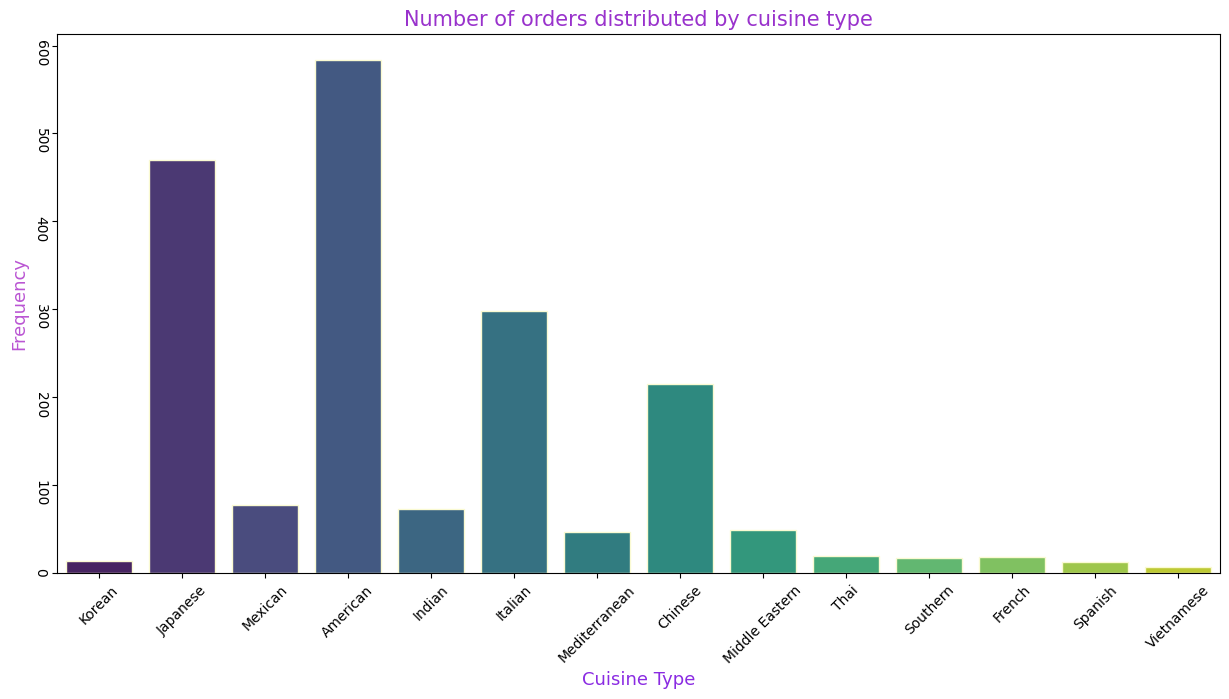

In [25]:
# Choose plot dimension
plt.figure(figsize=(15,7))

# Set title and name x,y axis
plt.title(('Number of orders distributed by cuisine type'), fontsize=15, color='darkorchid')
plt.xlabel('Cuisine Type', fontsize=13, color='blueviolet')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')

# Add tick marks to rotate your labels
plt.xticks(rotation = 45)
plt.yticks(rotation = 270)
sns.countplot(data = df, x = 'cuisine_type', palette='viridis',edgecolor='lightgoldenrodyellow')

In [26]:
# Count the total orders according to the most popular cuisines
american_count = df[df['cuisine_type'] == 'American']['cuisine_type'].count()
japanese_count = df[df['cuisine_type'] == 'Japanese']['cuisine_type'].count()
italian_count = df[df['cuisine_type'] == 'Italian']['cuisine_type'].count()
chinese_count = df[df['cuisine_type'] == 'Chinese']['cuisine_type'].count()
other_count = df[df['cuisine_type'].isin(['Korean','Japanese','Mexican', 'Indian', 'Mediterranean', 'Middle Eastern', 'Thai', 'Southern', 'French', 'Spanish','Vietnamese'])]['cuisine_type'].count()

print("Number of American cuisine orders:", american_count)
print("Number of Japanese cuisine orders:", japanese_count)
print("Number of Italian cuisine orders:", italian_count)
print("Number of Chinese cuisine orders:", chinese_count)
print("Number of orders from Korean, Japanese, Mexican, Indian, Mediterranean, Middle Eastern, Thai, Southern, French, Spanish,Vietnamese is:", other_count)


Number of American cuisine orders: 584
Number of Japanese cuisine orders: 470
Number of Italian cuisine orders: 298
Number of Chinese cuisine orders: 215
Number of orders from Korean, Japanese, Mexican, Indian, Mediterranean, Middle Eastern, Thai, Southern, French, Spanish,Vietnamese is: 801


In [27]:
# Create a variable cuisine_popular that = the top 4 most popular cuisines and add other where other = all cuisines not in the top 4
top_cuisines = ['American', 'Japanese', 'Italian', 'Chinese']

# Create a new column 'cuisine_popular'
df['cuisine_popular'] = df['cuisine_type'].apply(lambda x: x if x in top_cuisines else 'Other')

<ipython-input-28-024a43fb0756>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cuisine_popular', palette={'Other': 'lemonchiffon', 'Japanese': 'yellow', 'American': 'khaki', 'Italian': 'gold', 'Chinese': 'palegoldenrod'})


Text(0, 0.5, 'Number of Orders')

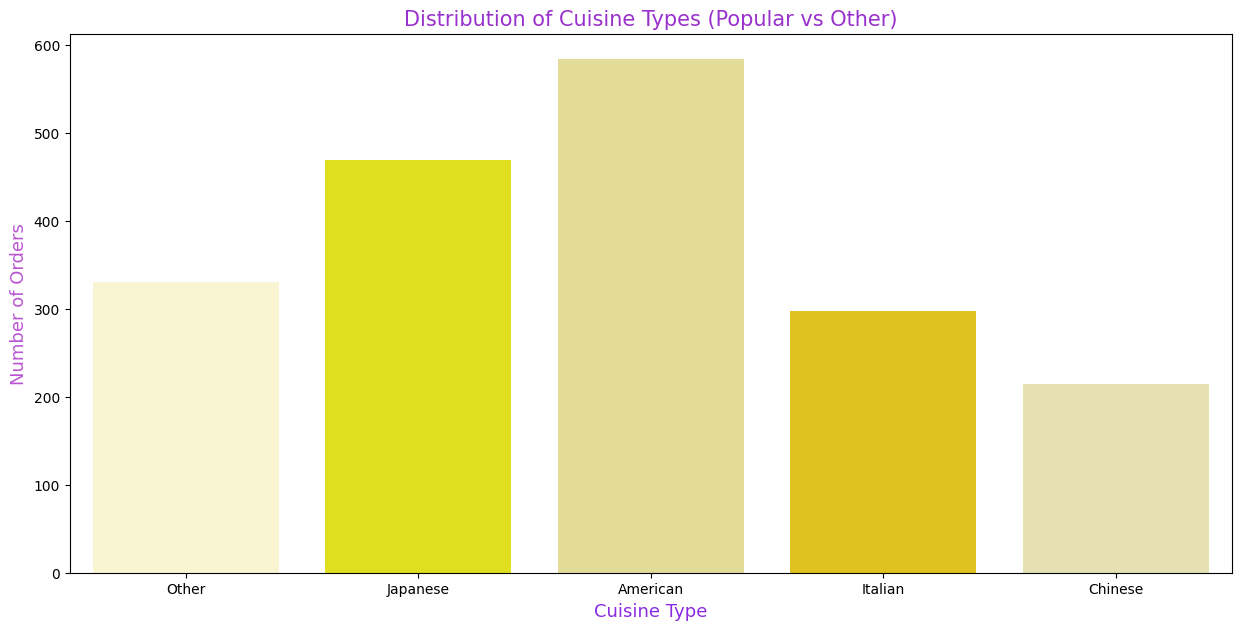

In [28]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='cuisine_popular', palette={'Other': 'lemonchiffon', 'Japanese': 'yellow', 'American': 'khaki', 'Italian': 'gold', 'Chinese': 'palegoldenrod'})
plt.title('Distribution of Cuisine Types (Popular vs Other)', fontsize=15, color='darkorchid')
plt.xlabel('Cuisine Type', fontsize=13, color='blueviolet')
plt.ylabel('Number of Orders', fontsize=13, color='mediumorchid')

In [29]:
# Calculate the probability of a customer ordering 'Other' cuisine
prob_other = df[df['cuisine_popular'] == 'Other']['cuisine_popular'].count() / df.shape[0]
print("Probability of ordering Other cuisine: {:.2f}".format(prob_other))

# Calculate the probability of a customer ordering 'Italian' cuisine
prob_italian = df[df['cuisine_type'] == 'Italian']['cuisine_type'].count() / df.shape[0]
print("Probability of ordering Italian cuisine: {:.2f}".format(prob_italian))

# Calculate the probability of a customer ordering 'Japanese' cuisine
prob_japanese = df[df['cuisine_type'] == 'Japanese']['cuisine_type'].count() / df.shape[0]
print("Probability of ordering Japanese cuisine: {:.2f}".format(prob_japanese))

# Calculate the probability of a customer ordering 'American' cuisine
prob_american = df[df['cuisine_type'] == 'American']['cuisine_type'].count() / df.shape[0]
print("Probability of ordering American cuisine: {:.2f}".format(prob_american))

# Calculate the probability of a customer ordering 'Chinese' cuisine
prob_chinese = df[df['cuisine_type'] == 'Chinese']['cuisine_type'].count() / df.shape[0]
print("Probability of ordering Chinese cuisine: {:.2f}".format(prob_chinese))

Probability of ordering Other cuisine: 0.17
Probability of ordering Italian cuisine: 0.16
Probability of ordering Japanese cuisine: 0.25
Probability of ordering American cuisine: 0.31
Probability of ordering Chinese cuisine: 0.11


In [30]:
# Identify unique customers that order american and non american cuisine
american_customers = df[df['cuisine_type'] == 'American']['customer_id'].unique()
non_american_customers = df[df['cuisine_type'] != 'American']['customer_id'].unique()

unique_american_customers = set(american_customers)
unique_non_american_customers = set(non_american_customers)

print("Number of unique customers who ordered American cuisine:", len(unique_american_customers))
print("Number of unique customers who ordered non-American cuisine:", len(unique_non_american_customers))

Number of unique customers who ordered American cuisine: 417
Number of unique customers who ordered non-American cuisine: 856


In [31]:
# Identify unique customers that ordered American and also ordered non-American cuisine
common_customers = unique_american_customers.intersection(unique_non_american_customers)
print("Number of unique customers who ordered both American and non-American cuisine:", len(common_customers))

Number of unique customers who ordered both American and non-American cuisine: 73


In [32]:
# Identify unique customers that ordered American cuisine and also ordered non-American cuisine more than once
american_customer_counts = df[df['cuisine_type'] == 'American']['customer_id'].value_counts()
non_american_customer_counts = df[df['cuisine_type'] != 'American']['customer_id'].value_counts()

# Customers who ordered American and non-American more than once
result_customers = set(american_customer_counts[american_customer_counts > 1].index).intersection(non_american_customer_counts[non_american_customer_counts > 1].index)

print("Number of unique customers who ordered both American and non-American cuisine more than once:", len(result_customers))

Number of unique customers who ordered both American and non-American cuisine more than once: 14


In [33]:
# Identify unique customers that ordered American and Chinese cuisine
american_customers = df[df['cuisine_type'] == 'American']['customer_id'].unique()
chinese_customers = df[df['cuisine_type'] == 'Chinese']['customer_id'].unique()

unique_american_customers = set(american_customers)
unique_chinese_customers = set(chinese_customers)

print("Number of unique customers who ordered American cuisine:", len(unique_american_customers))
print("Number of unique customers who ordered Chinese cuisine:", len(unique_chinese_customers))

# Identify unique customers that ordered American and also ordered Chinese cuisine
common_customers = unique_american_customers.intersection(unique_chinese_customers)
print("Number of unique customers who ordered both American and Chinese cuisine:", len(common_customers))

Number of unique customers who ordered American cuisine: 417
Number of unique customers who ordered Chinese cuisine: 162
Number of unique customers who ordered both American and Chinese cuisine: 13


#### Cost of the order

<Axes: title={'center': 'Distribution of Cost of the Order'}, xlabel='Cost of the Order', ylabel='Frequency'>

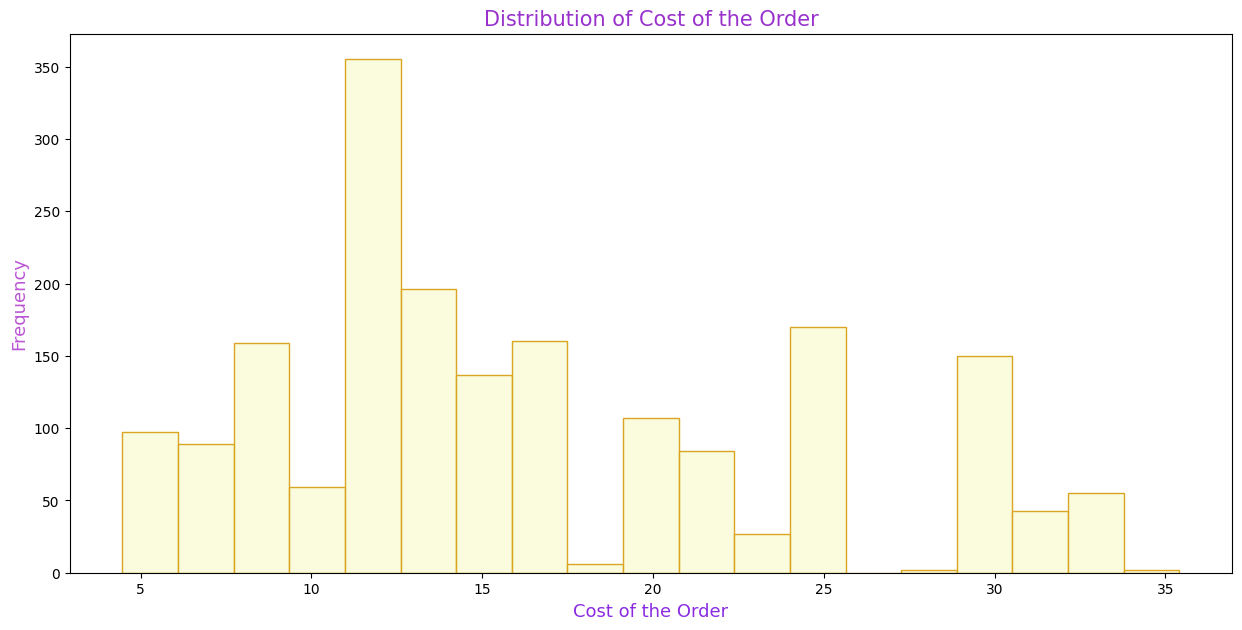

In [34]:
# Use histogram to plot cost of the order
plt.figure(figsize=(15, 7))
plt.title('Distribution of Cost of the Order', fontsize=15, color='darkorchid')
plt.xlabel('Cost of the Order', fontsize=13, color='blueviolet')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')
sns.histplot(data=df,x='cost_of_the_order', color='lightgoldenrodyellow',edgecolor='goldenrod')

<Axes: xlabel='Distribution of Cost of the Order', ylabel='Frequency'>

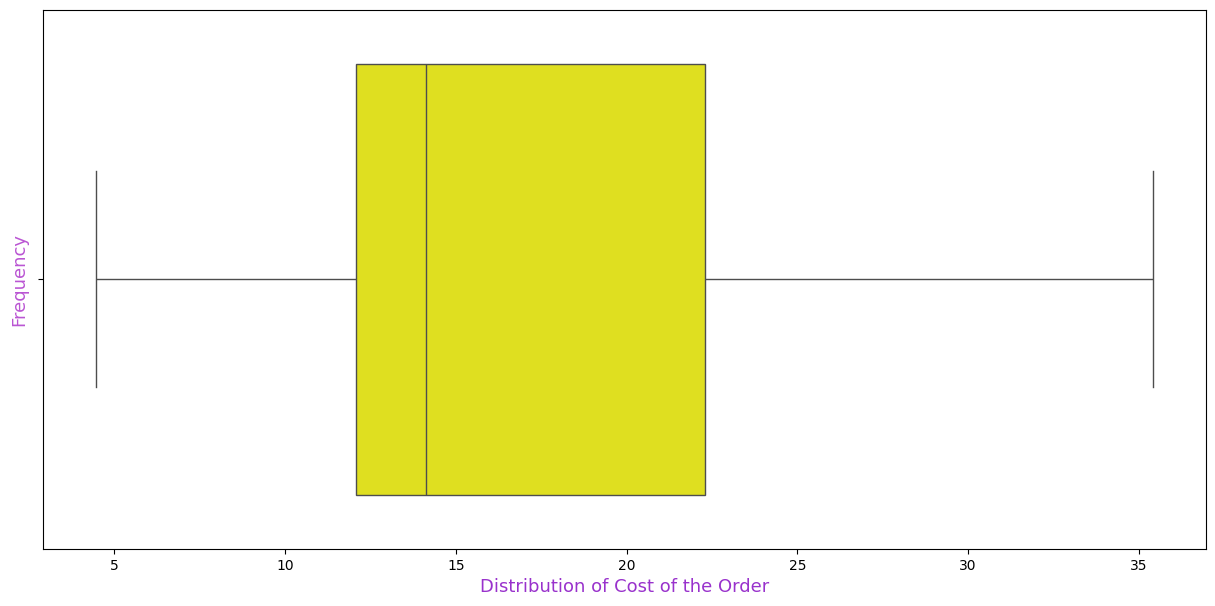

In [35]:
# Use histogram to plot cost of the order
plt.figure(figsize=(15, 7))
plt.xlabel('Distribution of Cost of the Order', fontsize=13, color='darkorchid')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')
sns.boxplot(data=df,x='cost_of_the_order',color='yellow')

<Axes: xlabel='Distribution of Cost of the Order', ylabel='Frequency'>

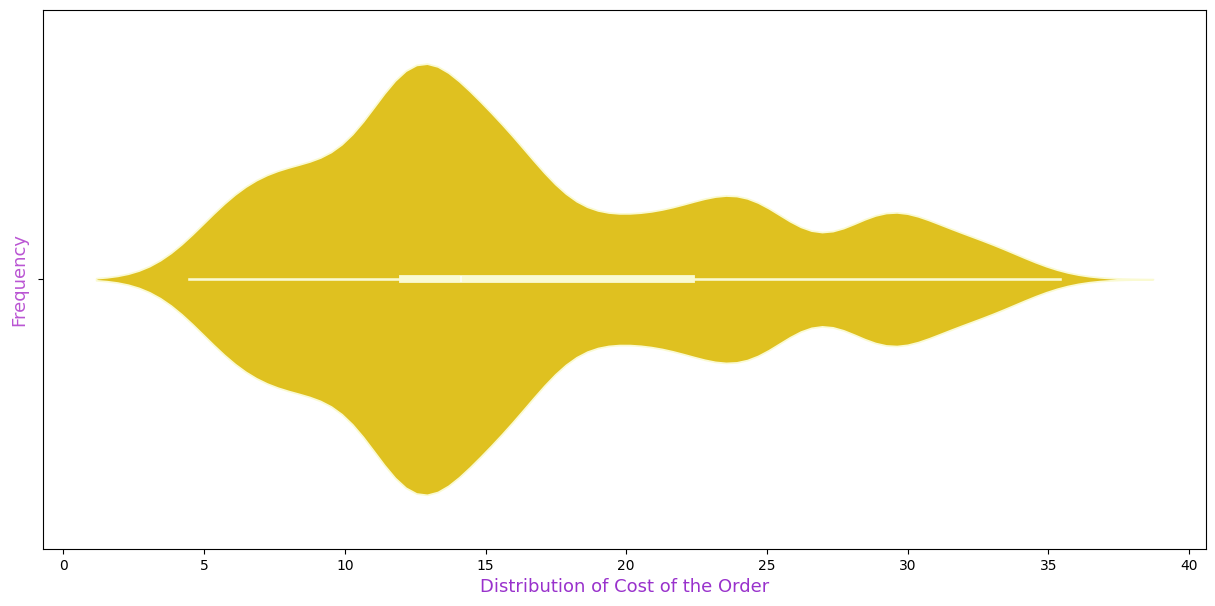

In [36]:
# Use violin plot to plot cost of the order
plt.figure(figsize=(15, 7))
plt.xlabel('Distribution of Cost of the Order', fontsize=13, color='darkorchid')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')
sns.violinplot(data=df,x='cost_of_the_order',color='gold',edgecolor='lightgoldenrodyellow')

#### Day of the week

In [37]:
# Unique values for day of the week
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

<Axes: title={'center': 'Distribution by Weekday and Weekend Day'}, xlabel='Weekend Days are Sa,Su                   Weekday Days are M, T, W, Th, F', ylabel='Frequency'>

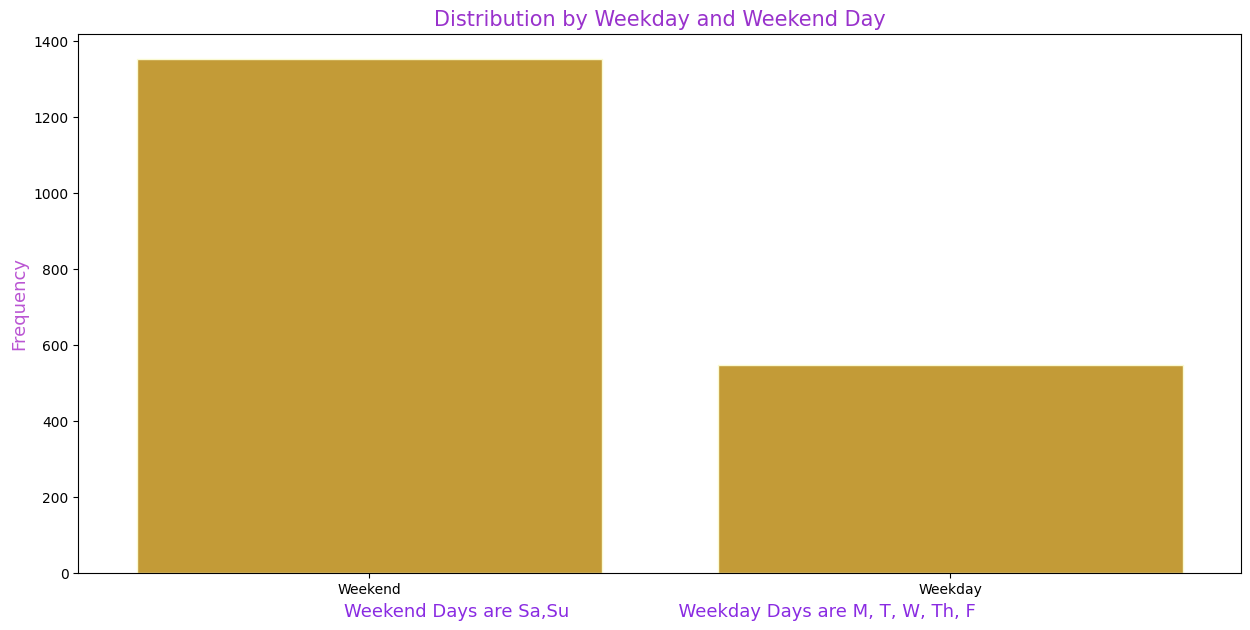

In [38]:
plt.figure(figsize=(15, 7))
plt.title('Distribution by Weekday and Weekend Day', fontsize=15, color='darkorchid')
plt.xlabel('Weekend Days are Sa,Su                   Weekday Days are M, T, W, Th, F', fontsize=13, color='blueviolet')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')
sns.countplot(data=df, x='day_of_the_week', color='goldenrod', edgecolor='lightgoldenrodyellow')

#### Rating

In [39]:
# Unique values for rating
array_rating = df['rating'].unique()
print(array_rating)

['Not given' '5' '3' '4']


In [40]:
# Calculate the percentage of orders that are not rated
not_rated_percentage = (df['rating'].value_counts()['Not given'] / df.shape[0]) * 100
print("Percentage of orders not rated: {:.2f}%".format(not_rated_percentage))

Percentage of orders not rated: 38.78%


In [41]:
# Calculate the percentage of orders that are ordered 5
rated_5_percentage = (df['rating'].value_counts()['5'] / df.shape[0]) * 100
print("Percentage of orders rated 5: {:.2f}%".format(rated_5_percentage))

Percentage of orders rated 5: 30.98%


<ipython-input-42-8019188d047a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', color='khaki', edgecolor='lightgoldenrodyellow', palette='Purples')


<Axes: title={'center': 'Available Ratings'}, xlabel='Rating Given by the Customer', ylabel='Frequency'>

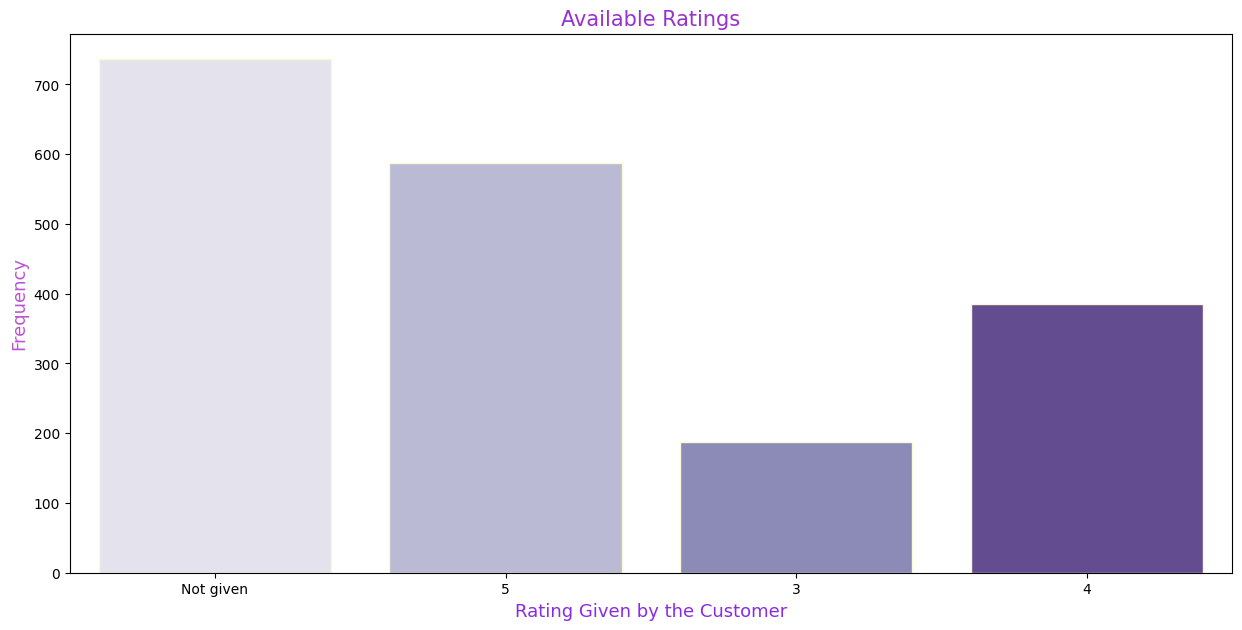

In [42]:
plt.figure(figsize=(15, 7))
plt.title('Available Ratings', fontsize=15, color='darkorchid')
plt.xlabel('Rating Given by the Customer', fontsize=13, color='blueviolet')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')
sns.countplot(data=df, x='rating', color='khaki', edgecolor='lightgoldenrodyellow', palette='Purples')

#### Food Preparation time

<Axes: title={'center': 'Distribution of Food Preparation Time'}, xlabel='Time', ylabel='Frequency'>

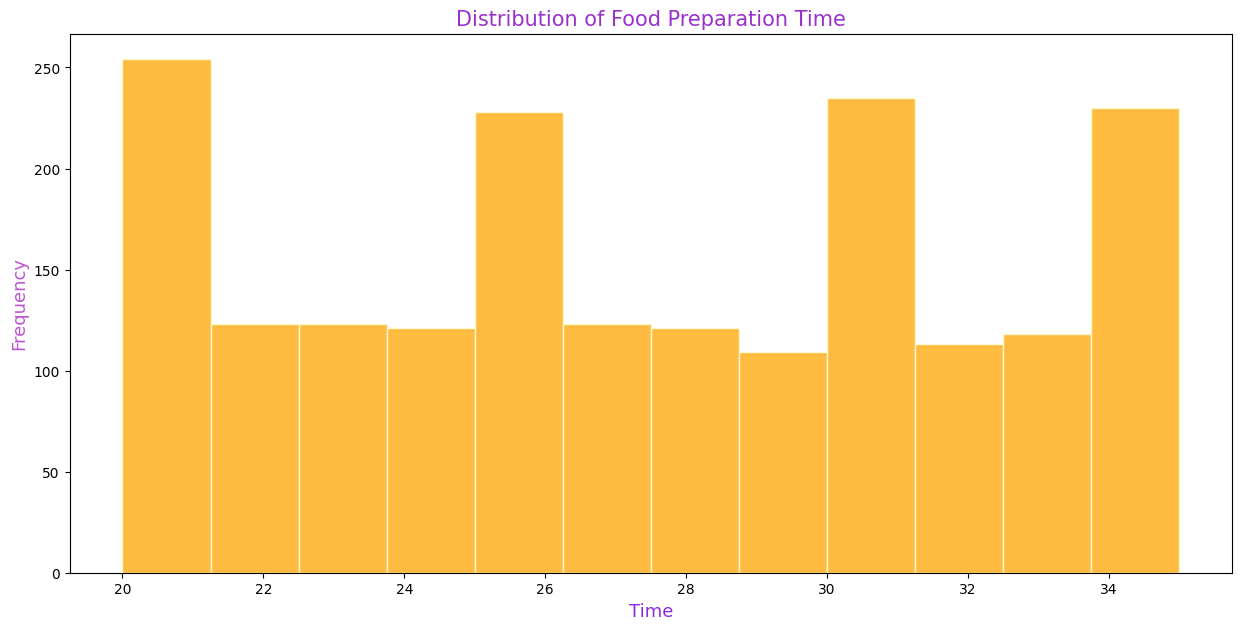

In [43]:
# Histogram of food preparation time
plt.figure(figsize=(15, 7))
plt.title('Distribution of Food Preparation Time', fontsize=15, color='darkorchid')
plt.xlabel('Time', fontsize=13, color='blueviolet')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')
sns.histplot(df['food_preparation_time'], edgecolor='lightgoldenrodyellow', color='Orange')

<Axes: title={'center': 'Distribution of Food Preparation Time'}, xlabel='Time', ylabel='Frequency'>

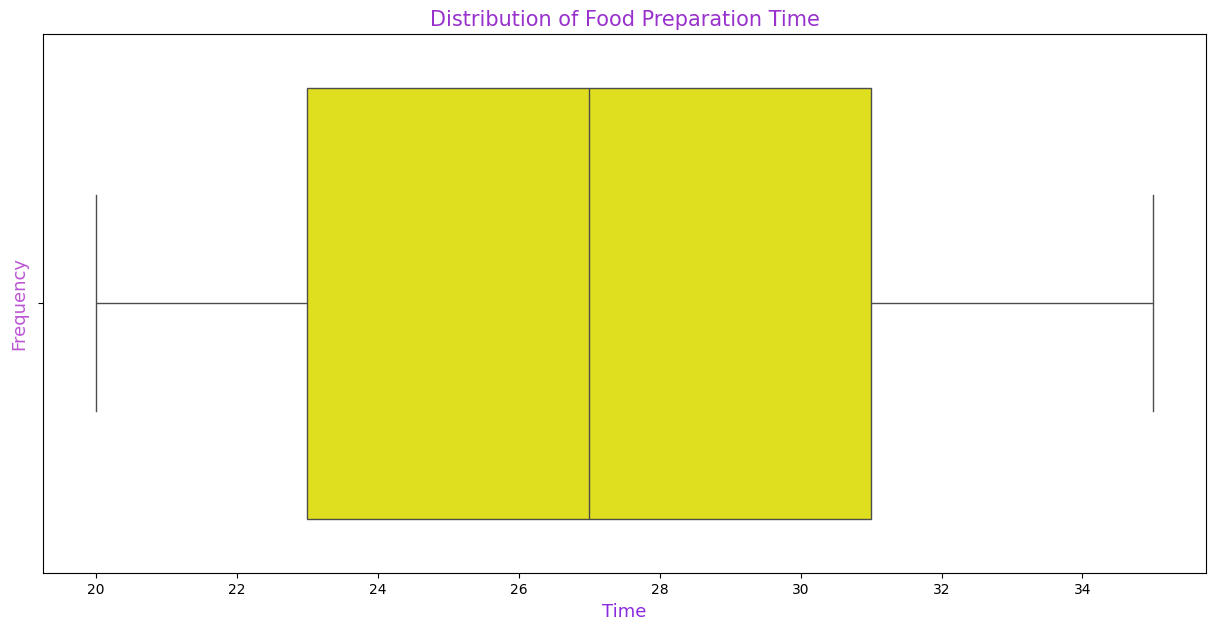

In [44]:
# Boxplot of food preparation time
plt.figure(figsize=(15, 7))
plt.title('Distribution of Food Preparation Time', fontsize=15, color='darkorchid')
plt.xlabel('Time', fontsize=13, color='blueviolet')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')
sns.boxplot(data=df, x='food_preparation_time', color='yellow')

#### Delivery time

<Axes: title={'center': 'Distribution of Delivery Time'}, xlabel='Time', ylabel='Frequency'>

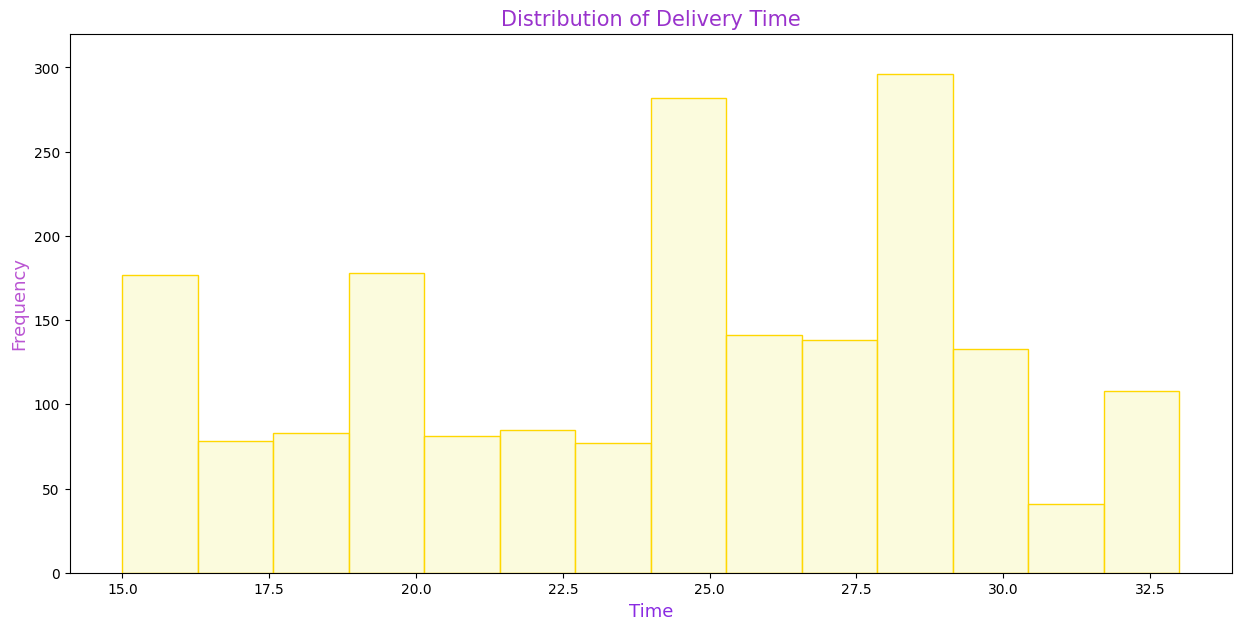

In [45]:
# Histogram of delivery time
plt.figure(figsize=(15, 7))
plt.title('Distribution of Delivery Time', fontsize=15, color='darkorchid')
plt.xlabel('Time', fontsize=13, color='blueviolet')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')
plt.ylim(ymax=320)
sns.histplot(data=df,x='delivery_time', edgecolor='gold', color='lightgoldenrodyellow')

<Axes: title={'center': 'Distribution of Delivery Time'}, xlabel='Time', ylabel='Frequency'>

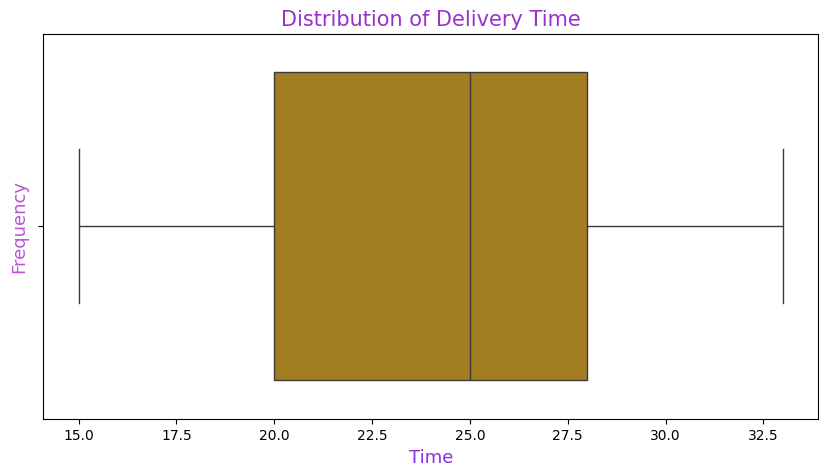

In [46]:
# Boxplot of delivery time
plt.figure(figsize=(10,5))
plt.title('Distribution of Delivery Time', fontsize=15, color='darkorchid')
plt.xlabel('Time', fontsize=13, color='blueviolet')
plt.ylabel('Frequency', fontsize=13, color='mediumorchid')
sns.boxplot(data=df, x='delivery_time', color='darkgoldenrod')


### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received?

In [47]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


### **Question 8:** Which is the most popular cuisine on weekends?

In [48]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
print('The most popular cuisine on the weekends is', df_weekend['cuisine_type'].value_counts().idxmax())

The most popular cuisine on the weekends is American


In [49]:
# Get unique values of cuisine on the weekends
df_weekend['cuisine_type'].unique()

array(['Korean', 'Japanese', 'American', 'Italian', 'Mexican',
       'Mediterranean', 'Chinese', 'Indian', 'Thai', 'Southern', 'French',
       'Spanish', 'Middle Eastern', 'Vietnamese'], dtype=object)

In [50]:
# Get the top 6 cuisine types

df['cuisine_type'].value_counts().head(6)

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73


<ipython-input-51-156eb44ed228>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_cuisines, x='cuisine_type', ax=axes[0], palette='viridis')
<ipython-input-51-156eb44ed228>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_restaurants, x='restaurant_name', ax=axes[1], palette='magma')


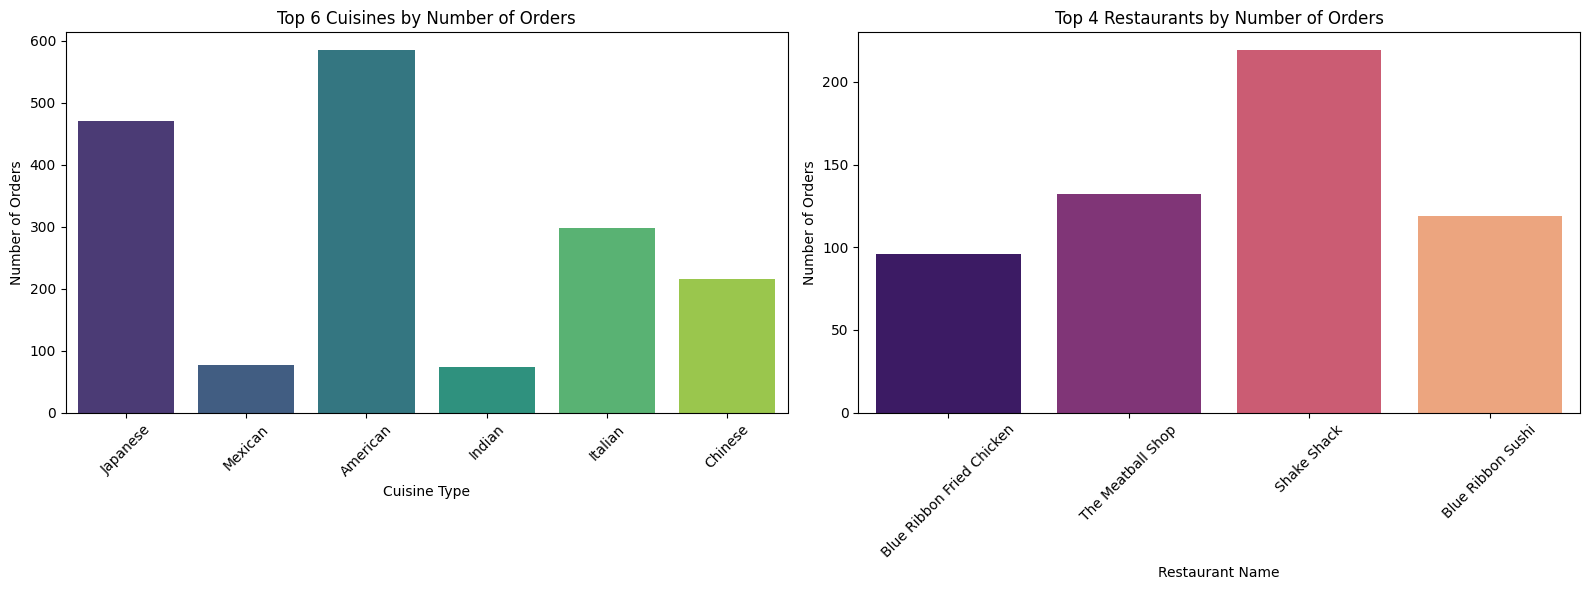

In [51]:
# Get the top 6 cuisines
top_6_cuisines = df['cuisine_type'].value_counts().head(6).index.tolist()

# Filter the DataFrame for the top 6 cuisines
df_top_cuisines = df[df['cuisine_type'].isin(top_6_cuisines)]

# Get the top 4 restaurants
top_4_restaurants = df['restaurant_name'].value_counts().head(4).index.tolist()

# Filter the DataFrame for the top 4 restaurants
df_top_restaurants = df[df['restaurant_name'].isin(top_4_restaurants)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for top 6 cuisines
sns.countplot(data=df_top_cuisines, x='cuisine_type', ax=axes[0], palette='viridis')
axes[0].set_title('Top 6 Cuisines by Number of Orders')
axes[0].set_xlabel('Cuisine Type')
axes[0].set_ylabel('Number of Orders')
axes[0].tick_params(axis='x', rotation=45)

# Plot for top 4 restaurants
sns.countplot(data=df_top_restaurants, x='restaurant_name', ax=axes[1], palette='magma')
axes[1].set_title('Top 4 Restaurants by Number of Orders')
axes[1].set_xlabel('Restaurant Name')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plot
plt.tight_layout()

In [52]:
# Get most popular cuisine on weekdays
df_weekday = df[df['day_of_the_week'] == 'Weekday']
df_weekday['cuisine_type'].value_counts().idxmax()

'American'

In [53]:
# Get top 3 cuisines on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(3)

,count
cuisine_type,
American,415
Japanese,335
Italian,207


In [54]:
# Calculate median order price on weekends
df[df['day_of_the_week'] == 'Weekend']['cost_of_the_order'].median()

14.41

In [55]:
# Calculate median order price on weekdays
df[df['day_of_the_week'] == 'Weekday']['cost_of_the_order'].median()

14.07

In [56]:
# Calculate highest median order by cuisine

df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values(ascending=False)

,cost_of_the_order
cuisine_type,
French,20.470
Thai,19.350
Spanish,16.520
Middle Eastern,16.300
Indian,16.150
Southern,16.110
Mexican,15.570
Italian,14.480
American,14.120


In [57]:
# Find lowest priced order and identify cuisine type
df.groupby('cuisine_type')['cost_of_the_order'].min().sort_values(ascending=True).head(1)

,cost_of_the_order
cuisine_type,
Japanese,4.47


In [58]:
# Find the lowest priced order
lowest_price_order = df[df['cost_of_the_order'] == df['cost_of_the_order'].min()]

# Get the cuisine type of the lowest priced order
lowest_price_cuisine = lowest_price_order['cuisine_type'].values[0]

print("Lowest priced order details:")
print(lowest_price_order[['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order']])  # Select relevant columns for display
print("\nCuisine type of the lowest priced order:", lowest_price_cuisine)


Lowest priced order details:
     order_id  customer_id restaurant_name cuisine_type  cost_of_the_order
624   1477349        52327  Nobu Next Door     Japanese               4.47

Cuisine type of the lowest priced order: Japanese


### **Question 9:** What percentage of the orders cost more than 20 dollars?

In [59]:
# Calculate the number of total orders where the cost is above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]
num_df_greater_than_20 = df_greater_than_20.shape[0]
# Print the DataFrame in a readable format
print(df_greater_than_20.to_string())


      order_id  customer_id                        restaurant_name    cuisine_type  cost_of_the_order day_of_the_week     rating  food_preparation_time  delivery_time cuisine_popular
0      1477147       337525                                Hangawi          Korean              30.75         Weekend  Not given                     25             20           Other
3      1477334       106968              Blue Ribbon Fried Chicken        American              29.20         Weekend          3                     25             15        American
5      1477224       147468                       Tamarind TriBeCa          Indian              25.22         Weekday          3                     20             24           Other
12     1476966       129969              Blue Ribbon Fried Chicken        American              24.30         Weekend          5                     23             17        American
17     1477373       139885              Blue Ribbon Sushi Izakaya        Japanese   

In [60]:
# Calculate the percentage orders where the cost is above 20 dollars
percentage_df_greater_than_20 = (num_df_greater_than_20 / df.shape[0]) * 100
print(percentage_df_greater_than_20)

29.24130663856691


### **Question 10:** What is the mean order delivery time?

In [61]:
# Get the mean delivery time
mean_delivery_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_delivery_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [62]:
# Get top 3 most frequent customers
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

<ipython-input-63-4d7685aff69e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='Oranges')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

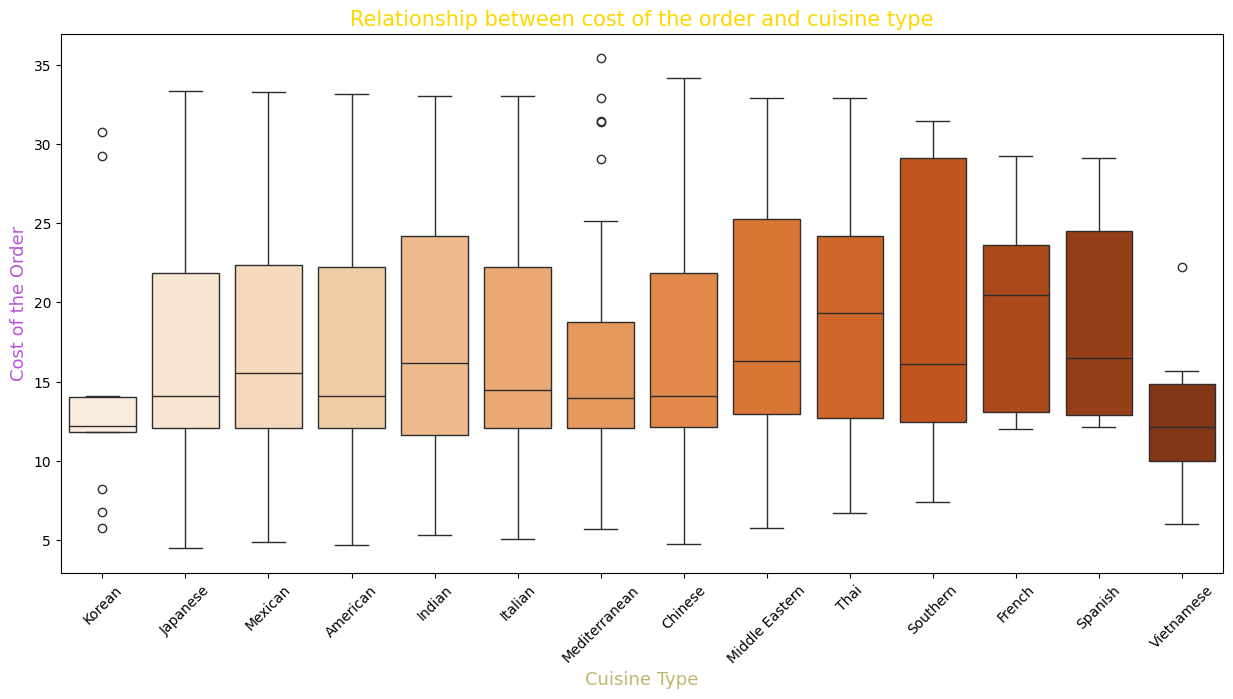

In [63]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
plt.title('Relationship between cost of the order and cuisine type', fontsize=15, color='gold')
plt.xlabel('Cuisine Type', fontsize=13, color='darkkhaki')
plt.ylabel('Cost of the Order', fontsize=13, color='mediumorchid')
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='Oranges')
plt.xticks(rotation = 45)

In [64]:
# Filter the DataFrame for Southern cuisine
southern_restaurants = df[df['cuisine_type'] == 'Southern']['restaurant_name'].unique()

# Print the list of Southern restaurants
print("Restaurants serving Southern cuisine:")
for restaurant in southern_restaurants:
  print(restaurant)

Restaurants serving Southern cuisine:
Hill Country Fried Chicken
Amy Ruth's


In [65]:
# Calculate number of american restaurants
# Filter the DataFrame for American cuisine
american_restaurants = df[df['cuisine_type'] == 'American']['restaurant_name'].unique()

# Print the number of American restaurants
print("Number of restaurants serving American cuisine:", len(american_restaurants))


Number of restaurants serving American cuisine: 41


In [66]:
# Filter the DataFrame for American cuisine
american_restaurants = df[df['cuisine_type'] == 'American']['restaurant_name'].unique()

# Print the list of American restaurants
print("Restaurants serving American cuisine:")
for restaurant in american_restaurants:
  print(restaurant)

Restaurants serving American cuisine:
Blue Ribbon Fried Chicken
Dirty Bird to Go
Lucky's Famous Burgers
Shake Shack
Five Guys Burgers and Fries
5 Napkin Burger
Cafeteria
DuMont Burger
Sarabeth's East
Westville Hudson
Blue Ribbon Brooklyn
Bareburger
The Odeon
The Meatball Shop
Five Leaves
Delicatessen
S'MAC
Waverly Diner
P.J. Clarke's
The Smile
Bubby's 
Dirty Bird To Go (archived)
Burger Joint
Sarabeth's Restaurant
Melt Shop
J. G. Melon
Friend of a Farmer
Dickson's Farmstand Meats
Dig Inn Seasonal Market
Alidoro
brgr
Sarabeth's
Big Daddy's
Moonstruck on Second
67 Burger
Schnipper's Quality Kitchen
Market Table
Lucky Strike
Rye House
Sarabeth's West
'wichcraft


#### Cuisine vs Food Preparation time

<ipython-input-67-ab617bb68fb5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='inferno')


<Axes: title={'center': 'Relationship between food preparation time and cuisine type'}, xlabel='Cuisine Type', ylabel='Food Preparation Time'>

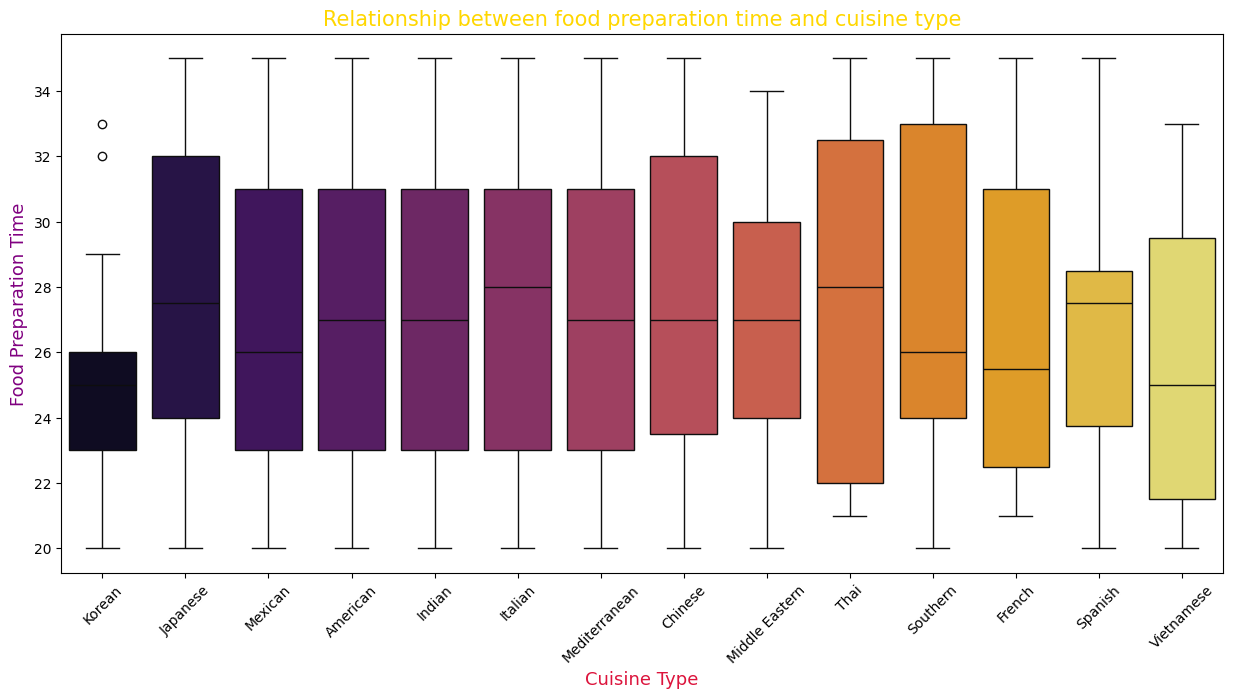

In [67]:
# Correlate food preparation time and cuisine type
plt.figure(figsize=(15,7))
plt.title('Relationship between food preparation time and cuisine type', fontsize=15, color='gold')
plt.xlabel('Cuisine Type', fontsize=13, color='crimson')
plt.ylabel('Food Preparation Time', fontsize=13, color='purple')
plt.xticks(rotation=45)
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='inferno')

<ipython-input-68-9589b11d795d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cuisine_type', y='food_preparation_time', edgecolor='gold', data=df, palette='inferno')


<Axes: title={'center': 'Relationship between food preparation time and cuisine type'}, xlabel='Cuisine Type', ylabel='Food Preparation Time'>

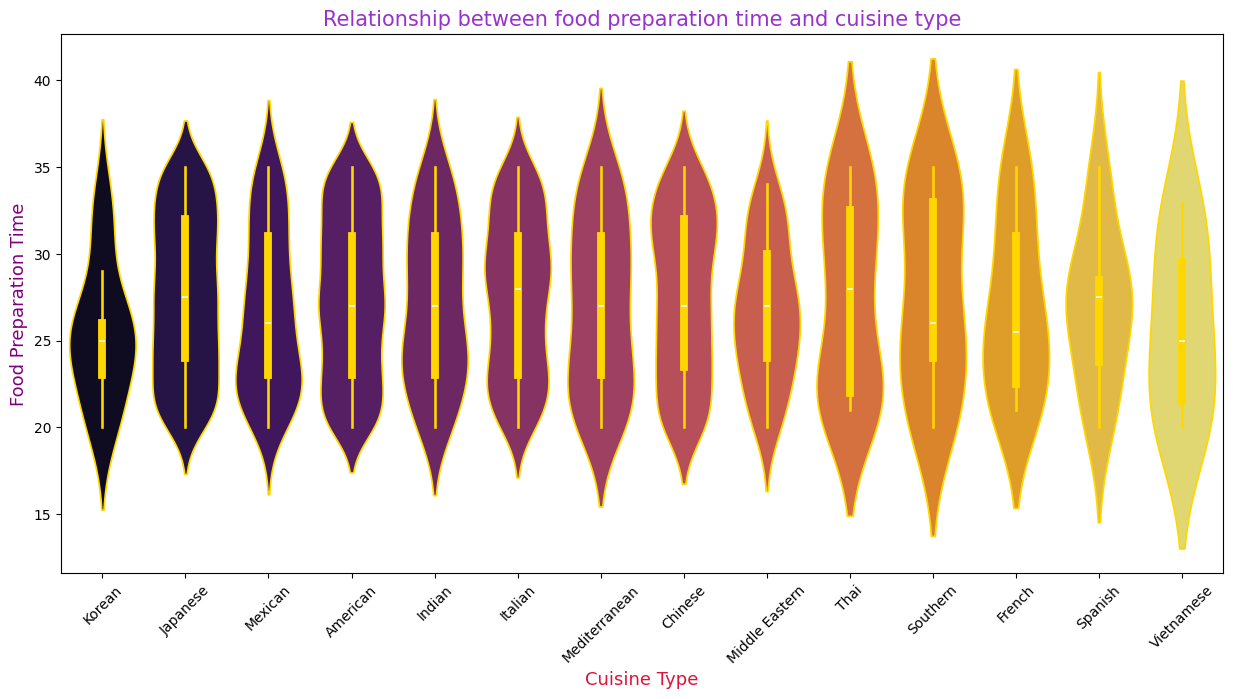

In [68]:
# Correlate food preparation time and cuisine type
plt.figure(figsize=(15,7))
plt.title('Relationship between food preparation time and cuisine type', fontsize=15, color='darkorchid')
plt.xlabel('Cuisine Type', fontsize=13, color='crimson')
plt.ylabel('Food Preparation Time', fontsize=13, color='purple')
plt.xticks(rotation=45)
sns.violinplot(x='cuisine_type', y='food_preparation_time', edgecolor='gold', data=df, palette='inferno')

<ipython-input-69-efedb7fde5cc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='rating', y='food_preparation_time', data=df, edgecolor='gold', palette='plasma')


<Axes: title={'center': 'Relationship between food preparation time and rating'}, xlabel='Rating', ylabel='Food Preparation Time'>

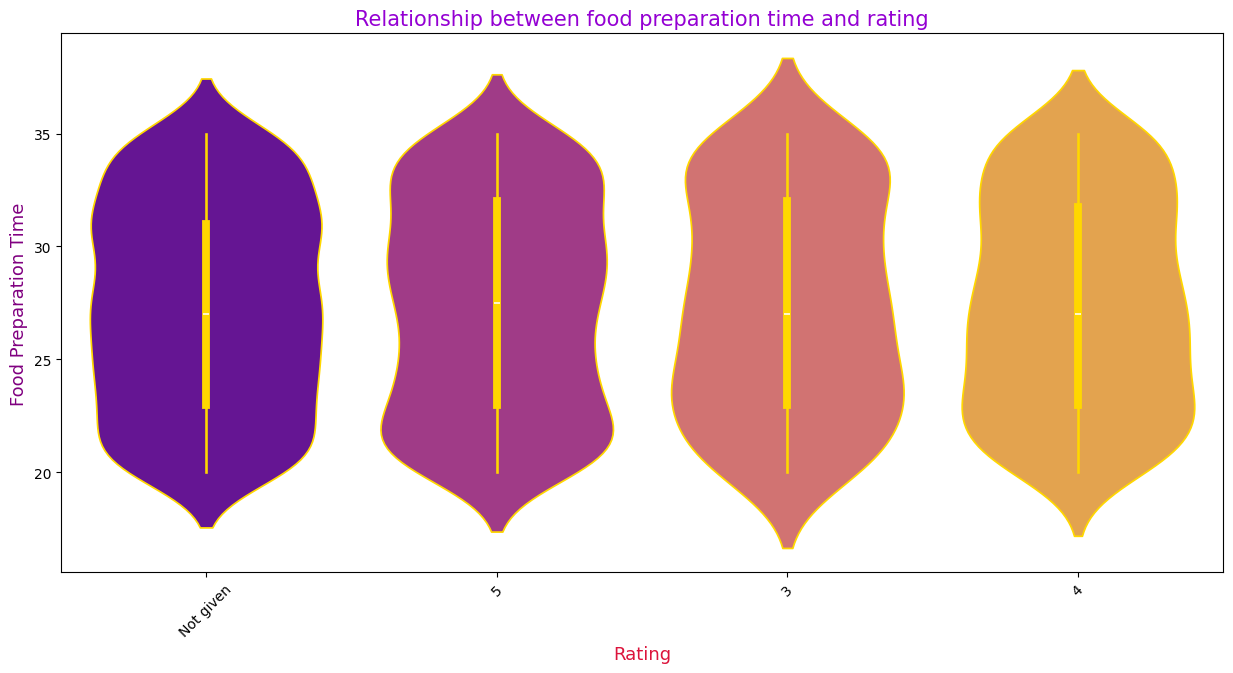

In [69]:
# Correlate food preparation time and rating violin

# Relationship between food preparation time and rating
plt.figure(figsize=(15,7))
plt.title('Relationship between food preparation time and rating', fontsize=15, color='darkviolet')
plt.xlabel('Rating', fontsize=13, color='crimson')
plt.ylabel('Food Preparation Time', fontsize=13, color='purple')
plt.xticks(rotation=45)
sns.violinplot(x='rating', y='food_preparation_time', data=df, edgecolor='gold', palette='plasma')

#### Day of the Week vs Delivery time

<ipython-input-70-225fea48c663>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='rating', y='delivery_time', data=df, palette='plasma')


<Axes: title={'center': 'Relationship between rating and delivery time'}, xlabel='Rating', ylabel='Delivery Time'>

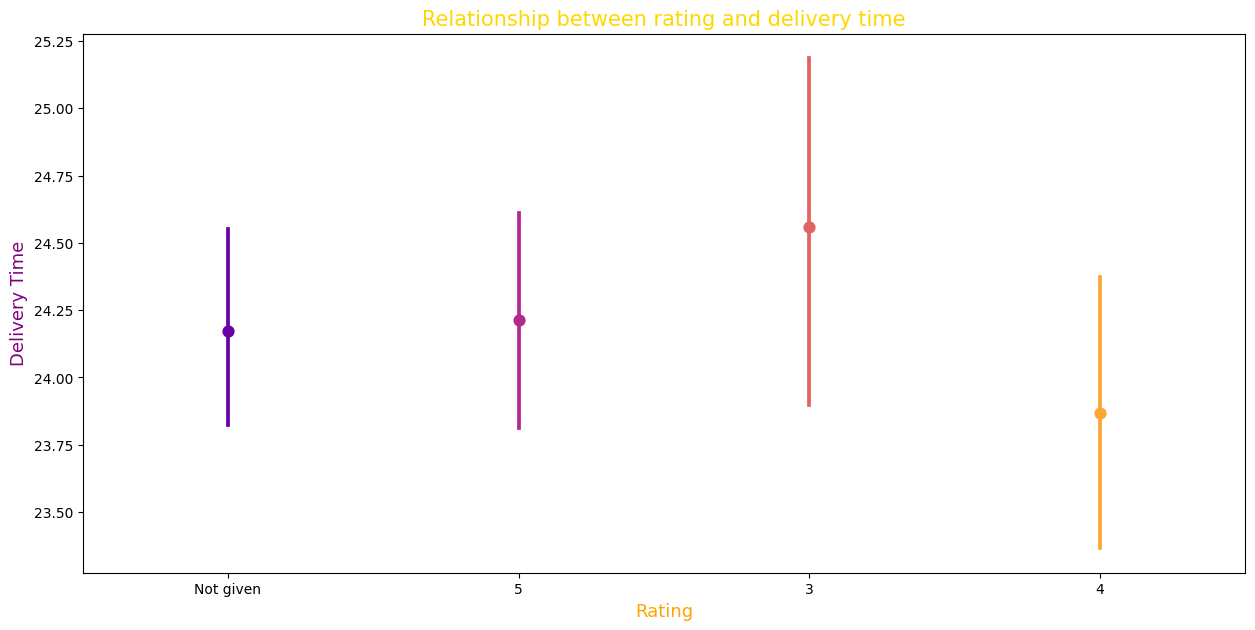

In [70]:
# Correlate rating and delivery time
plt.figure(figsize=(15, 7))
plt.title('Relationship between rating and delivery time', fontsize=15, color='gold')
plt.xlabel('Rating', fontsize=13, color='orange')
plt.ylabel('Delivery Time', fontsize=13, color='purple')
sns.pointplot(x='rating', y='delivery_time', data=df, palette='plasma')

<ipython-input-71-da1f45ab8611>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='plasma')


<Axes: title={'center': 'Relationship between day of the week and delivery time'}, xlabel='Day of the Week', ylabel='Delivery Time'>

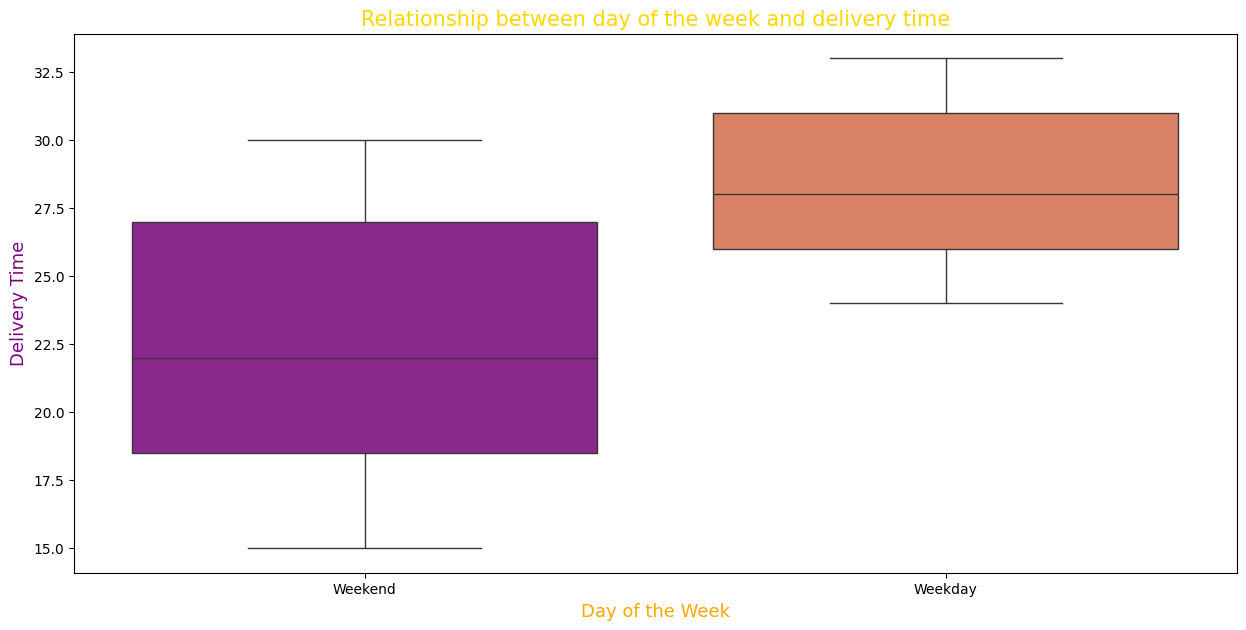

In [71]:
# Correlate day of the week and delivery time
plt.figure(figsize=(15,7))
plt.title('Relationship between day of the week and delivery time', fontsize=15, color='gold')
plt.xlabel('Day of the Week', fontsize=13, color='orange')
plt.ylabel('Delivery Time', fontsize=13, color='purple')
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='plasma')

In [72]:
# Calculate mean delivery time on weekend
mean_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print("Mean delivery time on weekends: {:.2f} minutes".format(mean_delivery_time_weekend))

Mean delivery time on weekends: 22.47 minutes


In [73]:
# Calculate mean delivery time on weekday
mean_delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print("Mean delivery time on weekdays: {:.2f} minutes".format(mean_delivery_time_weekday))

Mean delivery time on weekdays: 28.34 minutes


In [74]:
# Calculate the percentage difference mean delivery on weekday to weekend
percentage_difference = ((mean_delivery_time_weekday - mean_delivery_time_weekend) / mean_delivery_time_weekend) * 100
print("Mean delivery time on weekdays is {:.2f}% greater than on weekends.".format(percentage_difference))

Mean delivery time on weekdays is 26.12% greater than on weekends.


#### Run the below code and write your observations on the revenue generated by the restaurants

My observation is that Shake Shack is the most popular restaurant, followed by The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken.

In [75]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


#### Rating vs Delivery time

#### Rating vs Food preparation time

#### Rating vs Cost of the order

<ipython-input-76-fbf25ffae4af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='rating', y='cost_of_the_order', data=df, edgecolor='goldenrod', palette='Purples')


<Axes: title={'center': 'Relationship between rating and cost of the order'}, xlabel='Rating', ylabel='Cost of the Order'>

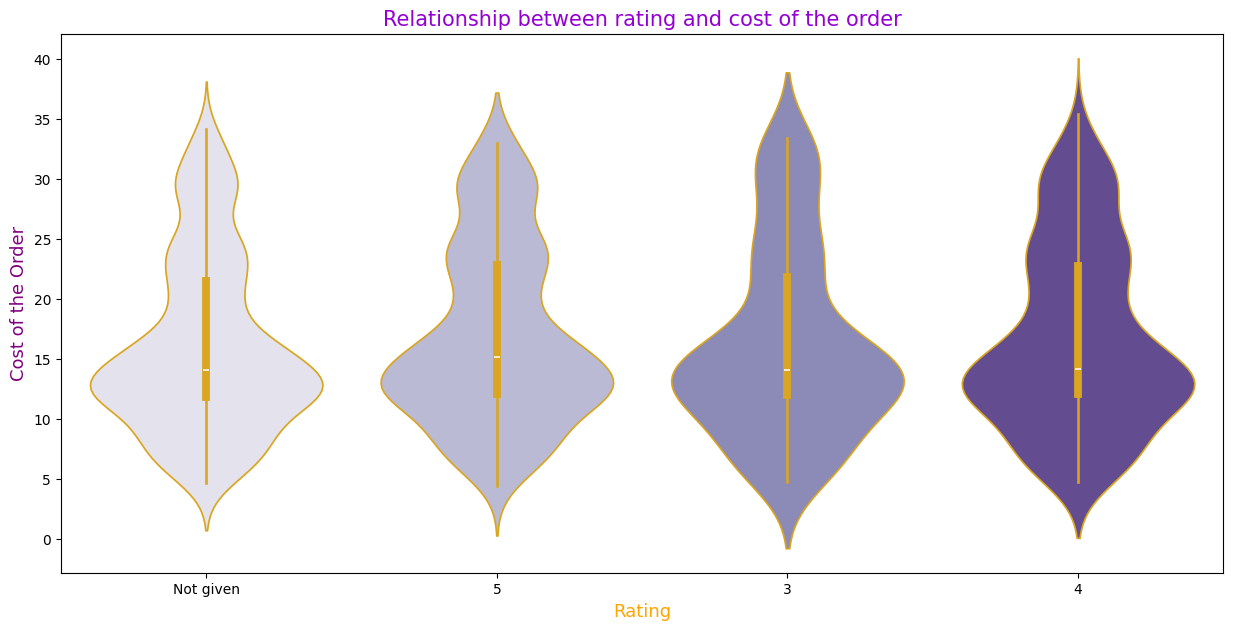

In [76]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
plt.title('Relationship between rating and cost of the order', fontsize=15, color='darkviolet')
plt.xlabel('Rating', fontsize=13, color='orange')
plt.ylabel('Cost of the Order', fontsize=13, color='purple')
sns.violinplot(x='rating', y='cost_of_the_order', data=df, edgecolor='goldenrod', palette='Purples')

#### Correlation among variables

<Axes: >

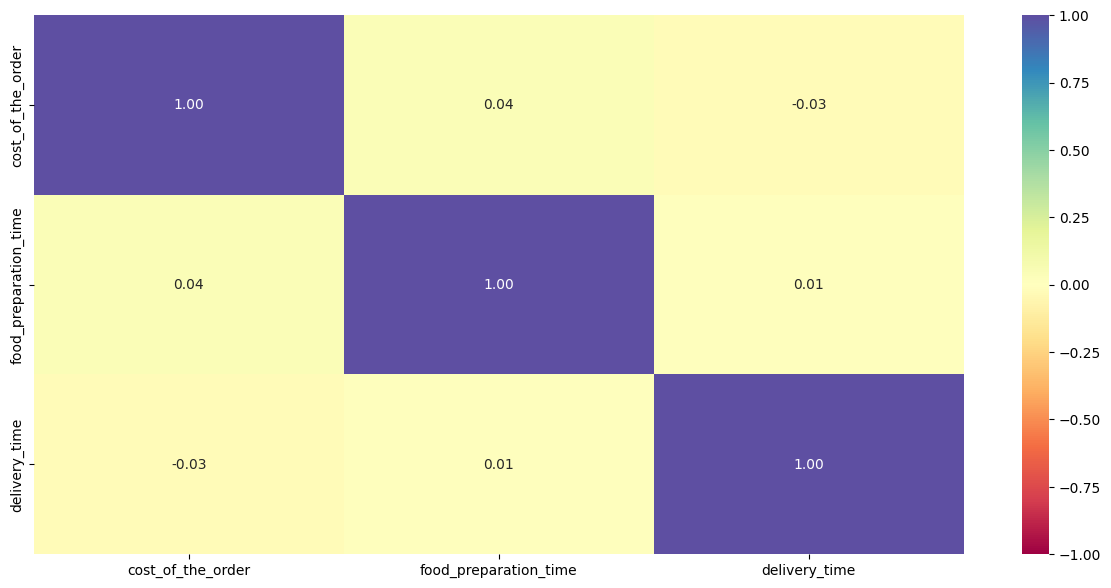

In [77]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [78]:
# Filter the DataFrame for ratings 4 and above
df_rated = df[df['rating'].isin(['4', '5']) ]

# Filter the rated restaurants
df_filtered = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

<ipython-input-78-581f8a627a5c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['rating'] = df_rated['rating'].astype('int')


,restaurant_name,rating
0,Shake Shack,110
1,The Meatball Shop,74
2,Blue Ribbon Sushi,57
3,Blue Ribbon Fried Chicken,53
4,RedFarm Broadway,33


<ipython-input-79-911393a3ae80>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='restaurant_name', data=promo_restaurants, palette='YlOrRd')


<Axes: title={'center': 'Restaurants Eligible for Promotion'}, xlabel='Number of Ratings (Above 4 or 5)', ylabel='Restaurant Name'>

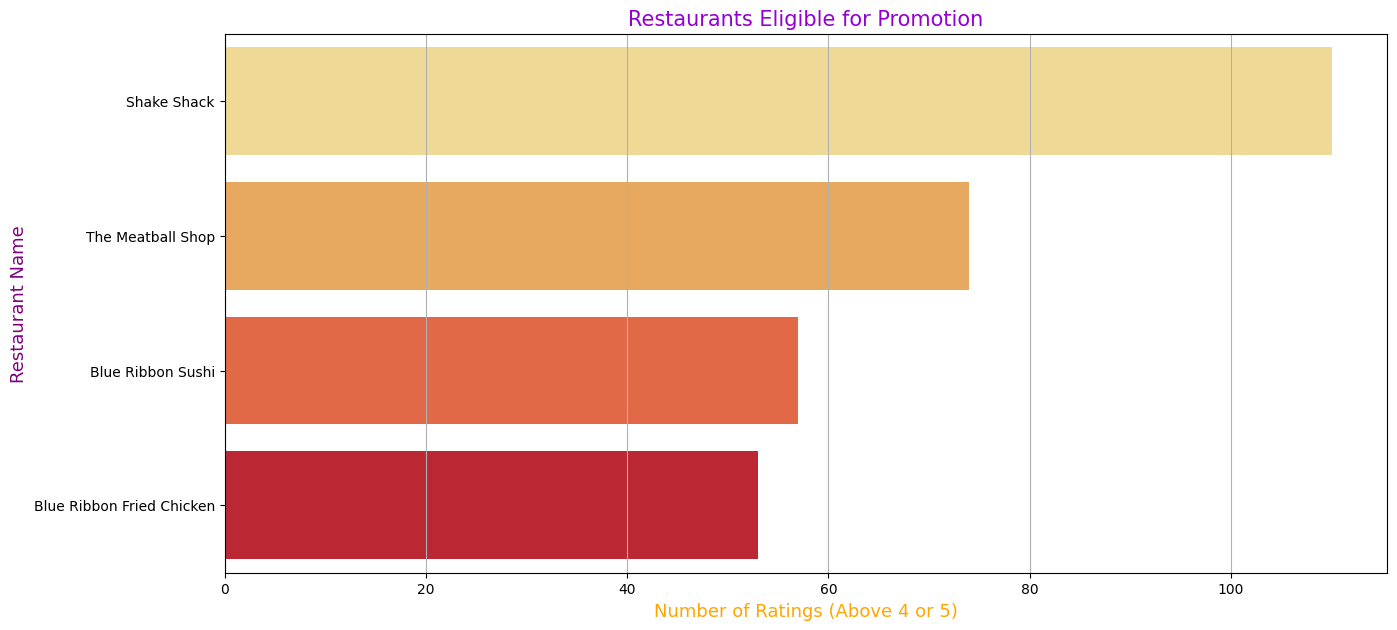

In [79]:
# Calculate the average rating for each restaurant
average_ratings = df_rated.groupby('restaurant_name')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

# Merge the average ratings with the rating counts
df_rating_summary = pd.merge(df_rating_count, average_ratings, on='restaurant_name')

# Filter restaurants with more than 50 ratings and average rating greater than 4
promo_restaurants = df_rating_summary[(df_rating_summary['rating'] > 50) & (df_rating_summary['average_rating'] > 4)]

# Create a visually appealing plot
plt.figure(figsize=(15, 7))
plt.title('Restaurants Eligible for Promotion', fontsize=15, color='darkviolet')
plt.xlabel('Number of Ratings (Above 4 or 5)', fontsize=13, color='orange')
plt.ylabel('Restaurant Name', fontsize=13, color='purple')
plt.grid(axis='x')
sns.barplot(x='rating', y='restaurant_name', data=promo_restaurants, palette='YlOrRd')

In [80]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.716216
1,Blue Ribbon Fried Chicken,4.603774
2,Blue Ribbon Sushi,4.561404
3,Shake Shack,4.545455


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [81]:
# Determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cuisine_popular,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,Other,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Japanese,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Other,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,American,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,American,1.7385


In [82]:
# Calculate revenue from orders over 20 dollars
revenue_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

# Calculate revenue from orders between 5 and 20 dollars
revenue_5_to_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

# Calculate total net revenue
net_revenue = revenue_over_20 + revenue_5_to_20

print("Net revenue generated by the company: $", round(net_revenue, 2))

Net revenue generated by the company: $ 6166.3


In [83]:
# Calculate the total revenue
total_revenue = df['Revenue'].sum()
print("The net revenue generated by the company is $",round(total_revenue,2))

The net revenue generated by the company is $ 6166.3


Text(0.5, 1.0, 'Revenue Distribution by Restaurant (Above 3%)')

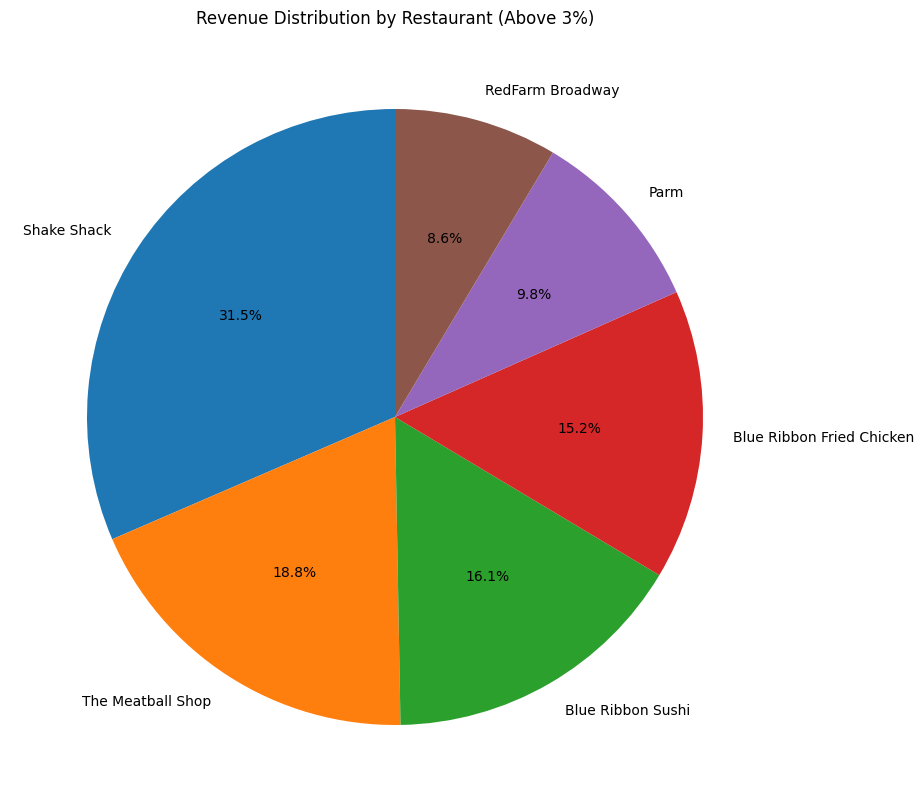

In [84]:
# Group the data by restaurant name and calculate the total revenue for each restaurant
revenue_by_restaurant = df.groupby('restaurant_name')['Revenue'].sum().sort_values(ascending=False)

# Calculate the percentage of revenue for each restaurant
revenue_percentage = revenue_by_restaurant / revenue_by_restaurant.sum() * 100

# Filter out restaurants with less than 3% revenue
revenue_above_3_percent = revenue_percentage[revenue_percentage >= 3]

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(revenue_above_3_percent, labels=revenue_above_3_percent.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Restaurant (Above 3%)')

Text(0.5, 1.0, 'Revenue Distribution by Restaurant')

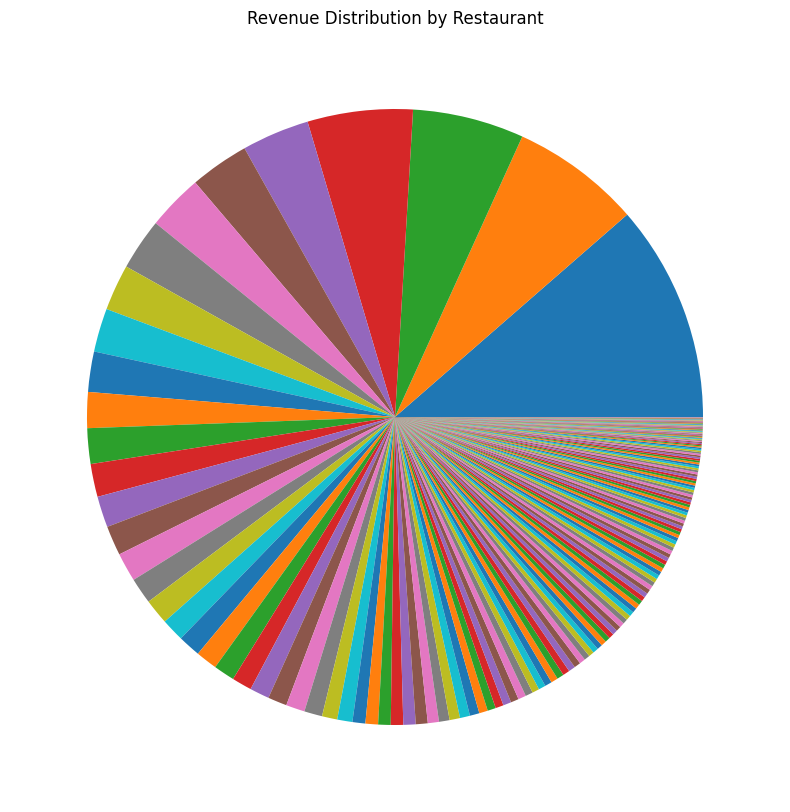

In [85]:
# Create a pie chart without percentages or labels
plt.figure(figsize=(10, 10))
plt.pie(revenue_by_restaurant)
plt.title('Revenue Distribution by Restaurant')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


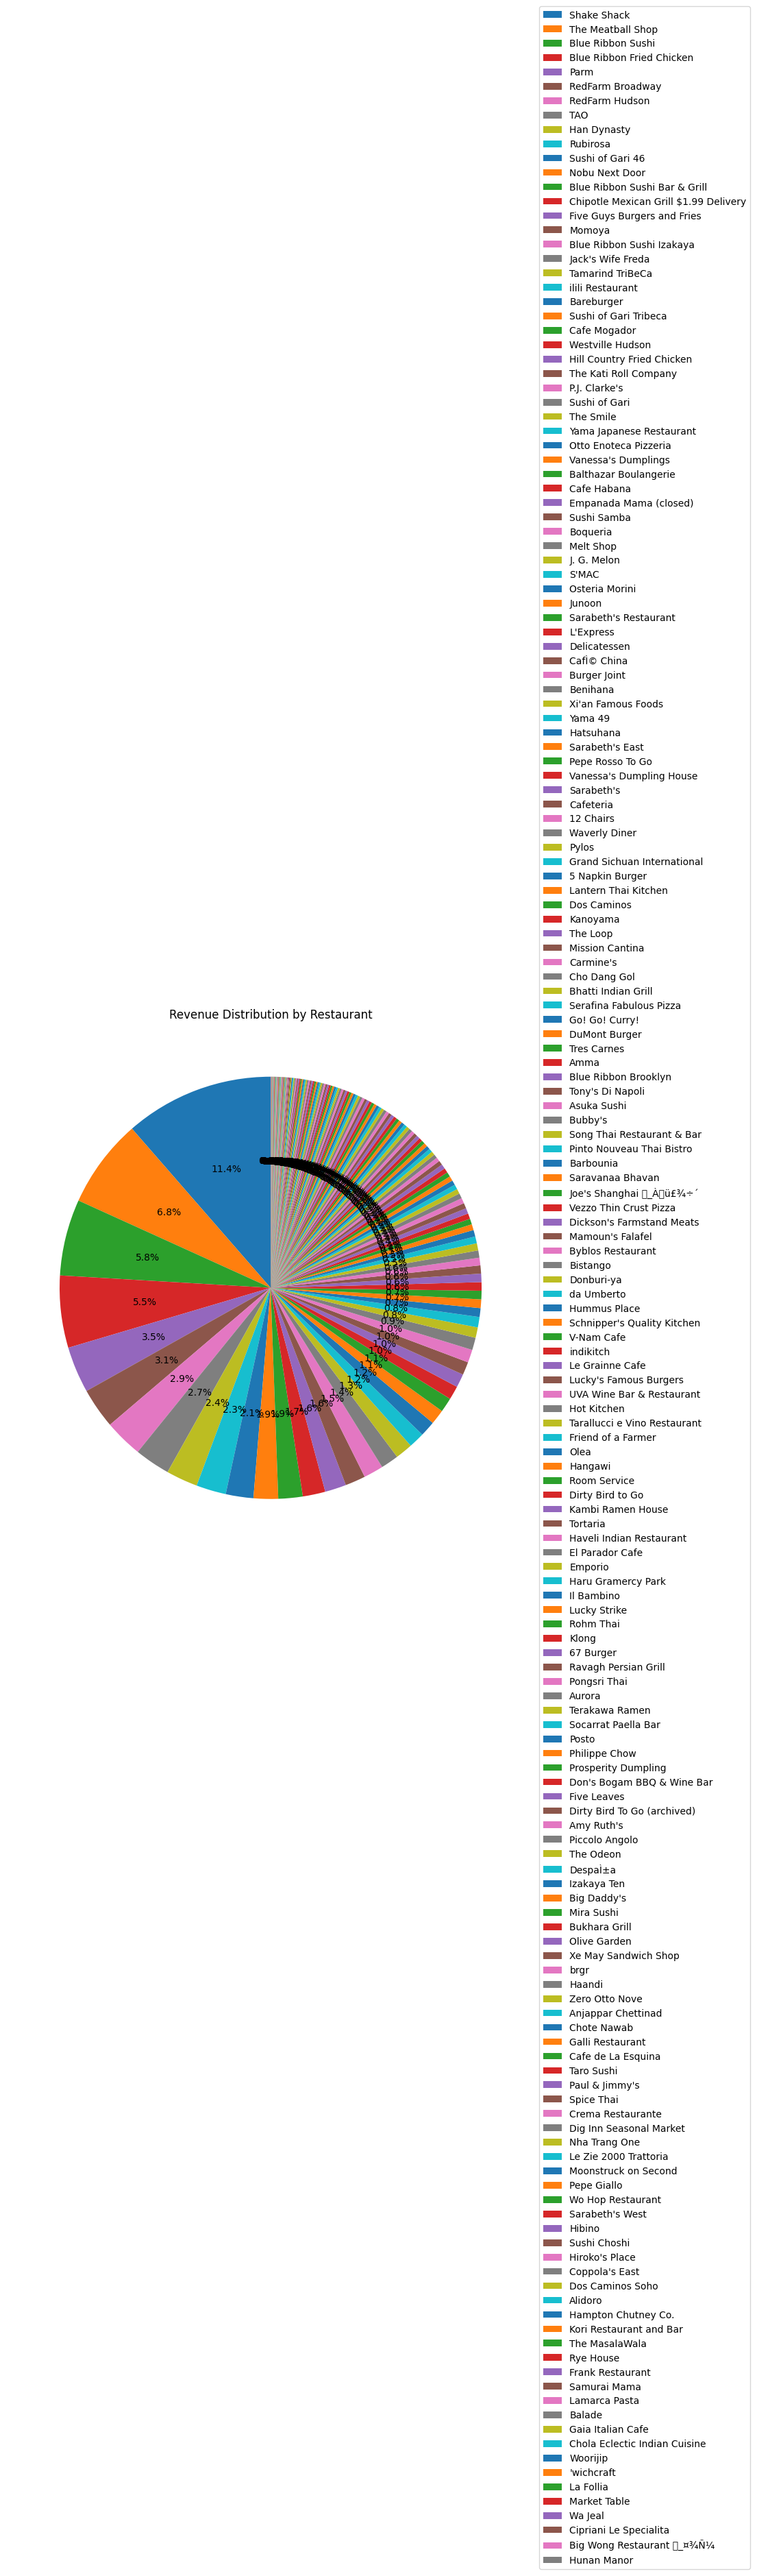

In [86]:
# prompt: remove restaurant names # Group the data by restaurant name and calculate the total revenue for each restaurant
# revenue_by_restaurant = df.groupby('restaurant_name')['Revenue'].sum().sort_values(ascending=False)
# # Create a pie chart
# plt.figure(figsize=(10, 10))
# plt.pie(revenue_by_restaurant, labels=revenue_by_restaurant.index, autopct='%1.1f%%', startangle=90)
# plt.title('Revenue Distribution by R

# Group the data by restaurant name and calculate the total revenue for each restaurant
revenue_by_restaurant = df.groupby('restaurant_name')['Revenue'].sum().sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(revenue_by_restaurant, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Restaurant')
plt.legend(revenue_by_restaurant.index, loc='center left', bbox_to_anchor=(1, 0.5))

In [91]:
# prompt: # Create beautiful 3d scatter plot of company revenue, axis points should be top 4 restaurants, average order and rating

import plotly.express as px

# Calculate average order value for each restaurant
avg_order_value = df.groupby('restaurant_name')['cost_of_the_order'].mean()

# Calculate average rating for each restaurant
avg_rating = df_rated.groupby('restaurant_name')['rating'].mean()

# Get top 4 restaurants by revenue
top_4_restaurants = revenue_by_restaurant.head(4).index

# Filter data for top 4 restaurants
df_top4 = df[df['restaurant_name'].isin(top_4_restaurants)]

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Restaurant': top_4_restaurants,
    'Revenue': revenue_by_restaurant.loc[top_4_restaurants],
    'Average Order Value': avg_order_value.loc[top_4_restaurants],
    'Average Rating': avg_rating.loc[top_4_restaurants]
})

# Create 3D scatter plot
fig = px.scatter_3d(plot_df, x='Average Order Value', y='Average Rating', z='Revenue',
                    color='Restaurant', size_max=10, opacity=0.7)

fig.update_layout(title='Company Revenue vs. Average Order Value and Rating (Top 4 Restaurants)',
                  scene=dict(xaxis_title='Average Order Value',
                             yaxis_title='Average Rating',
                             zaxis_title='Revenue'))

fig.show()


In [96]:
# Create a killer 3d scatter plot of company revenue. The axis points are the top 10 restaurants, average order and rating
# Calculate average order value for each restaurant
avg_order_value = df.groupby('restaurant_name')['cost_of_the_order'].mean()

# Calculate average rating for each restaurant
avg_rating = df_rated.groupby('restaurant_name')['rating'].mean()

# Get top 10 restaurants by revenue
top_10_restaurants = revenue_by_restaurant.head(10).index

# Filter data for top 10 restaurants
df_top10 = df[df['restaurant_name'].isin(top_10_restaurants)]

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Restaurant': top_10_restaurants,
    'Revenue': revenue_by_restaurant.loc[top_10_restaurants],
    'Average Order Value': avg_order_value.loc[top_10_restaurants],
    'Average Rating': avg_rating.loc[top_10_restaurants]
})

# Create 3D scatter plot
fig = px.scatter_3d(plot_df, x='Average Order Value', y='Average Rating', z='Revenue',
                    color='Restaurant', size_max=10, opacity=0.7)

fig.update_layout(title='Company Revenue vs. Average Order Value and Rating (Top 10 Restaurants)',
                  scene=dict(xaxis_title='Average Order Value',
                             yaxis_title='Average Rating',
                             zaxis_title='Revenue'))

In [97]:
# prompt: download above 3d scatter plot to my computer

fig.write_html('company_revenue_3d.html')
from google.colab import files
files.download('company_revenue_3d.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
# Create beautiful 3d scatter plot of company revenue

!pip install plotly
import plotly.express as px

# Assuming 'df' is your DataFrame and 'Revenue' is the column with revenue values

# Create a 3D scatter plot
fig = px.scatter_3d(df, x='cost_of_the_order', y='delivery_time', z='Revenue',
                    color='cuisine_type', size='Revenue',
                    opacity=0.7, title='Company Revenue by Order Cost, Delivery Time, and Cuisine')

# Customize the appearance
fig.update_layout(scene=dict(xaxis_title='Order Cost',
                             yaxis_title='Delivery Time',
                             zaxis_title='Revenue'))

# Display the plot
fig.show()


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [88]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the number of orders that take more than 60 minutes
num_orders_over_60 = df[df['total_time'] > 60].shape[0]

# Calculate the percentage of orders that take more than 60 minutes
percentage_over_60 = (num_orders_over_60 / df.shape[0]) * 100

print("Percentage of orders taking more than 60 minutes to deliver:", round(percentage_over_60, 2), '%')

Percentage of orders taking more than 60 minutes to deliver: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [89]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


In [90]:
# Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

*italicized text*---